# Introdução

Neste trabalho, temos como objetivo desenvolver um estudo completo sobre métodos de *Customer Segmentation* (Segmentação de Clientes). A segmentação de clientes é a prática de categorizar os clientes em grupos distintos com base em características compartilhadas, permitindo que as empresas direcionem e adaptem suas estratégias para cada grupo de forma eficaz. Os clientes geralmente são segmentados com base em suas semelhanças em comportamento, preferências e hábitos de compra.
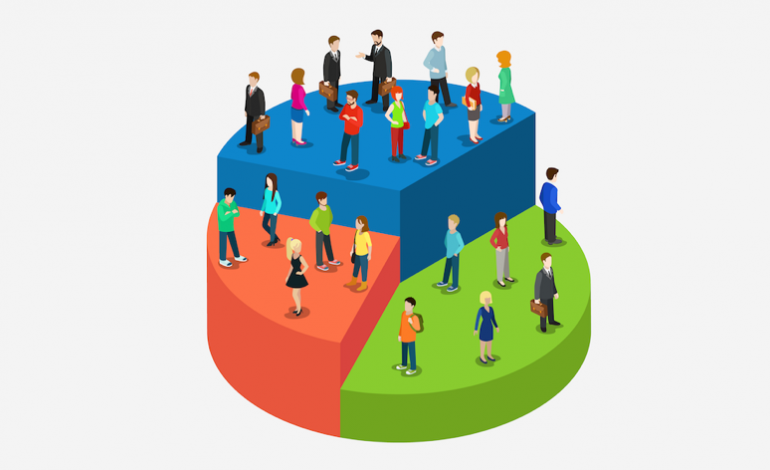

## Alunos

- Brainer Sueverti de Campos, 790829
- Cauê Bonfim Trevisan,  790867
- Felipe Lopes Duarte, 790792

Link para o Dataset: https://www.kaggle.com/datasets/alifarahmandfar/customer-segmentation

# Análise Exploratória

## Descrição das Variáveis
Primeiramente precisamos entender as variáveis que compõem nosso conjunto de dados, a fim de compreender a situação problema e entender as principais características dos clientes do nosso *dataset*.
1. **ID do Cliente**: Identificador único para cada cliente no conjunto de dados;
2. **Saldo**: O valor atual do saldo na conta do cliente;
3. **Frequência do Saldo**: Com que frequência o saldo do cliente é atualizado;
4. **Valor Total**: Valor total gasto pelo cliente em compras;
5. **Valor Total Compras Únicas**: Valor gasto em compras únicas;
6. **Valor Total Compras Parceladas**: Valor gasto em compras parceladas;
7. **Valor Total de Adiantamento**: Valor total de adiantamentos em dinheiro feito pelo cliente;
8. **Frequência de Compras**: Frequência total de compras realizadas pelos clientes;
9. **Frequências de Compras Únicas**: Frequência total de compras únicas realizadas pelos clientes;
10. **Frequência de Compras Parceladas**: Frequência total de compras parceladas realizadas pelos clientes;
11. **Frequência de Adiantamento**: Frequência de adiantamentos em dinheiro feitos;
12. **Número de Adiantamentos em Dinheiro**: Número de transações envolvendo adiantamentos em dinheiro;
13. **Número de Compras**: Número de transações de compra;
14. **Limite de Crédito**: O limite de crédito atribuído ao cliente;
15. **Pagamentos**: Valor total de pagamentos feitos pelo cliente;
16. **Pagamentos Mínimos**: Pagamentos mínimos do cliente;
17. **Pagamento Completo**: A porcentagem do pagamento integral feito pelo cliente;
18. **Tempo Cliente**: O tempo em que o cliente está com a empresa, em meses

## Leitura do Dataset

In [72]:
import pandas as pd
from google.colab import drive
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv("/content/Customer_Data.csv")
df.rename(columns={"CUST_ID": "ID",
                  "BALANCE": "Saldo",
                  "BALANCE_FREQUENCY": "Frequência do Saldo",
                  "PURCHASES": "Valor Total",
                  "ONEOFF_PURCHASES": "Valor Total Compras Únicas",
                  "INSTALLMENTS_PURCHASES":"Valor Total Compras Parceladas",
                  "CASH_ADVANCE":"Valor Total de Adiantamento",
                  "PURCHASES_FREQUENCY":"Frequência de Compras",
                  "ONEOFF_PURCHASES_FREQUENCY":"Frequência de Compras Únicas",
                  "PURCHASES_INSTALLMENTS_FREQUENCY":"Frequência de Compras Parceladas",
                  "CASH_ADVANCE_FREQUENCY":"Frequência de Adiantamento",
                  "CASH_ADVANCE_TRX":"Número de Adiantamentos em Dinheiro",
                  "PURCHASES_TRX":"Número de Compras",
                  "CREDIT_LIMIT":"Limite de Crédito",
                  "PAYMENTS":"Pagamentos",
                  "MINIMUM_PAYMENTS":"Pagamentos Mínimos",
                  "PRC_FULL_PAYMENT":"Pagamento Completo",
                  "TENURE":"Tempo Cliente"
                   }, inplace = True)

df.replace('NaN',None, inplace=True)
df.head(10)

,ID,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Únicas,Valor Total Compras Parceladas,Valor Total de Adiantamento,Frequência de Compras,Frequência de Compras Únicas,Frequência de Compras Parceladas,Frequência de Adiantamento,Número de Adiantamentos em Dinheiro,Número de Compras,Limite de Crédito,Pagamentos,Pagamentos Mínimos,Pagamento Completo,Tempo Cliente
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## Informações Iniciais

In [73]:
# Imprime um resumo conciso do DataFrame;
# Este método imprime informações sobre o DataFrame, incluindo o índice dtype e colunas, valores não nulos e uso de memória.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   8950 non-null   object 
 1   Saldo                                8950 non-null   float64
 2   Frequência do Saldo                  8950 non-null   float64
 3   Valor Total                          8950 non-null   float64
 4   Valor Total Compras Únicas           8950 non-null   float64
 5   Valor Total Compras Parceladas       8950 non-null   float64
 6   Valor Total de Adiantamento          8950 non-null   float64
 7   Frequência de Compras                8950 non-null   float64
 8   Frequência de Compras Únicas         8950 non-null   float64
 9   Frequência de Compras Parceladas     8950 non-null   float64
 10  Frequência de Adiantamento           8950 non-null   float64
 11  Número de Adiantamentos em Din

In [74]:
# Irá informar estatísticas descritivas, incluindo aquelas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.

df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Saldo,8950.0,1564.475,2081.532,0.000,128.282,873.385,2054.140,19043.139
Frequência do Saldo,8950.0,0.877,0.237,0.000,0.889,1.000,1.000,1.000
Valor Total,8950.0,1003.205,2136.635,0.000,39.635,361.280,1110.130,49039.570
Valor Total Compras Únicas,8950.0,592.437,1659.888,0.000,0.000,38.000,577.405,40761.250
Valor Total Compras Parceladas,8950.0,411.068,904.338,0.000,0.000,89.000,468.638,22500.000
Valor Total de Adiantamento,8950.0,978.871,2097.164,0.000,0.000,0.000,1113.821,47137.212
Frequência de Compras,8950.0,0.490,0.401,0.000,0.083,0.500,0.917,1.000
Frequência de Compras Únicas,8950.0,0.202,0.298,0.000,0.000,0.083,0.300,1.000
Frequência de Compras Parceladas,8950.0,0.364,0.397,0.000,0.000,0.167,0.750,1.000
Frequência de Adiantamento,8950.0,0.135,0.200,0.000,0.000,0.000,0.222,1.500


## Análise de Dados Faltantes

In [75]:
df.isnull().sum()

ID                                       0
Saldo                                    0
Frequência do Saldo                      0
Valor Total                              0
Valor Total Compras Únicas               0
Valor Total Compras Parceladas           0
Valor Total de Adiantamento              0
Frequência de Compras                    0
Frequência de Compras Únicas             0
Frequência de Compras Parceladas         0
Frequência de Adiantamento               0
Número de Adiantamentos em Dinheiro      0
Número de Compras                        0
Limite de Crédito                        1
Pagamentos                               0
Pagamentos Mínimos                     313
Pagamento Completo                       0
Tempo Cliente                            0
dtype: int64

In [76]:
# Irá remover as linhas do DataFrame que têm valores ausentes em qualquer uma das colunas;
# Isso é útil para limpar o conjunto de dados, removendo os registros que possam conter valores faltantes, o que pode interferir na análise ou no uso subsequente dos dados;
# Nesse caso, iremos remover a coluna de pagamentos mínimos e retirar os dados faltantes subsequentes.

df = df.drop(columns = ['Pagamentos Mínimos'])
df = df.dropna()
df.isnull().sum()

ID                                     0
Saldo                                  0
Frequência do Saldo                    0
Valor Total                            0
Valor Total Compras Únicas             0
Valor Total Compras Parceladas         0
Valor Total de Adiantamento            0
Frequência de Compras                  0
Frequência de Compras Únicas           0
Frequência de Compras Parceladas       0
Frequência de Adiantamento             0
Número de Adiantamentos em Dinheiro    0
Número de Compras                      0
Limite de Crédito                      0
Pagamentos                             0
Pagamento Completo                     0
Tempo Cliente                          0
dtype: int64

## Análise de Dados Duplicados

In [77]:
# Retorna uma série booleana denotando linhas duplicadas.

df.duplicated().sum()

0

## Mudanças no *Dataset* e Limpeza dos Dados
1. ID: Como o ID é alocado de maneira arbitrária para cada usuário, tal atributo será inútil para a nossa análise, então pode ser removido. Isso aumentará a acurácia do modelo e reduzirá o tempo de processamento.

In [78]:
# Retirando a coluna ID.

df = df.drop('ID', axis='columns')
df.head(10)

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Únicas,Valor Total Compras Parceladas,Valor Total de Adiantamento,Frequência de Compras,Frequência de Compras Únicas,Frequência de Compras Parceladas,Frequência de Adiantamento,Número de Adiantamentos em Dinheiro,Número de Compras,Limite de Crédito,Pagamentos,Pagamento Completo,Tempo Cliente
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,0.000000,12


## Análise de Mínimos e Máximos

In [79]:
df.min()

Saldo                                   0.0
Frequência do Saldo                     0.0
Valor Total                             0.0
Valor Total Compras Únicas              0.0
Valor Total Compras Parceladas          0.0
Valor Total de Adiantamento             0.0
Frequência de Compras                   0.0
Frequência de Compras Únicas            0.0
Frequência de Compras Parceladas        0.0
Frequência de Adiantamento              0.0
Número de Adiantamentos em Dinheiro     0.0
Número de Compras                       0.0
Limite de Crédito                      50.0
Pagamentos                              0.0
Pagamento Completo                      0.0
Tempo Cliente                           6.0
dtype: float64

In [80]:
df.max()

Saldo                                  19043.13856
Frequência do Saldo                        1.00000
Valor Total                            49039.57000
Valor Total Compras Únicas             40761.25000
Valor Total Compras Parceladas         22500.00000
Valor Total de Adiantamento            47137.21176
Frequência de Compras                      1.00000
Frequência de Compras Únicas               1.00000
Frequência de Compras Parceladas           1.00000
Frequência de Adiantamento                 1.50000
Número de Adiantamentos em Dinheiro      123.00000
Número de Compras                        358.00000
Limite de Crédito                      30000.00000
Pagamentos                             50721.48336
Pagamento Completo                         1.00000
Tempo Cliente                             12.00000
dtype: float64

## BoxPlot
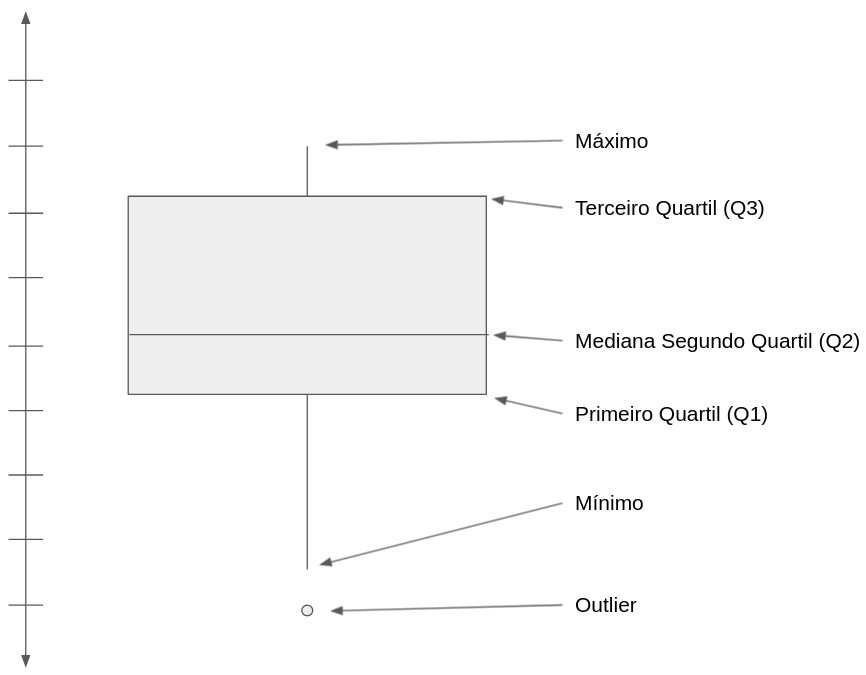

In [81]:
# Ferramenta gráfica para auxílio da análise estatísticas dos atributos numéricos.

n = df.columns
m = []
fig = make_subplots(rows=4, cols=4)
for i in range(0,len(n),4):
  m.append(n[i:i+4])
for i in range(4):
  for j in range(4):
    if ((i > 3) & (j > 0)):
      n
    else:
      fig.add_trace(go.Box(y = df[m[i][j]],name = m[i][j], pointpos = 0, boxmean = True),row = i+1,col = j+1)
fig.update_layout(
    font = {'family': 'Arial White','size': 17,'color': 'White'},
    template = 'plotly_dark',
    title=dict(
        text = 'BoxPlot - Dataset',
        x = 0.5,
        font = dict(
            family = 'Arial White',
            size = 25,
            color = 'White'
        )
    ),
    height=1100, width=1300)
fig.show()

## Matriz de Correlação
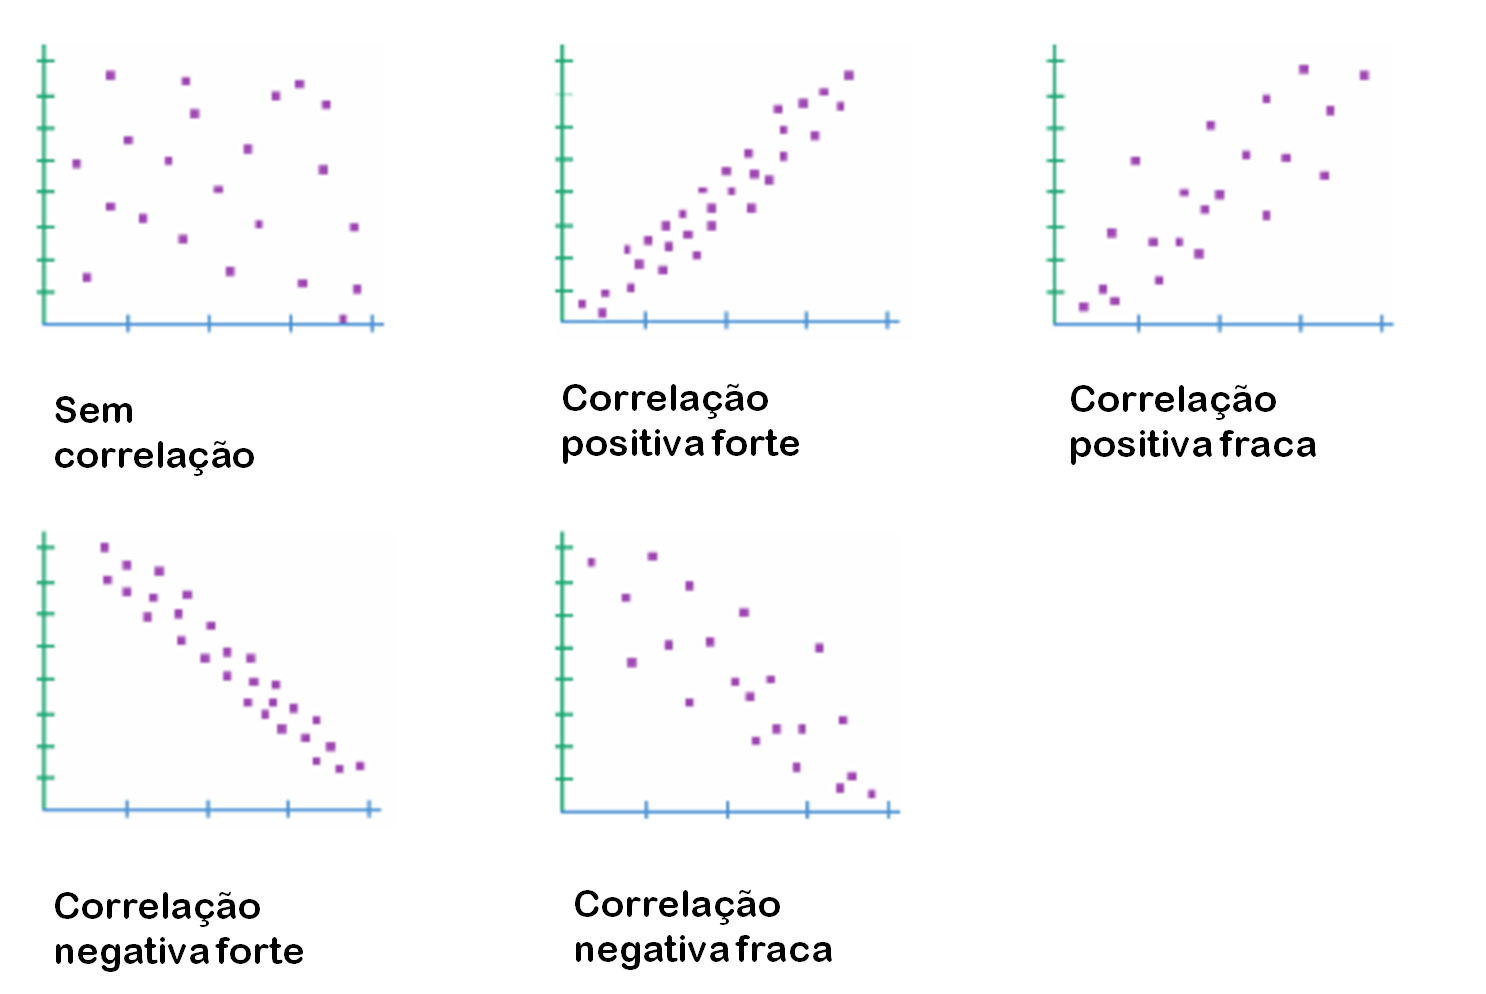

In [82]:
# Tabela que indica os coeficientes de conexão entre os atributos.

df_corr = df.corr().round(2)
df_corr_collumns = df_corr.columns
for i in range(len(df_corr)):
  for j in range(len(df_corr)):
    if i<=j:
      df_corr[df_corr_collumns[i]][df_corr_collumns[j]] = None
fig = px.imshow(df_corr,text_auto=True)
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Matriz de Correlação - Dataset',
        x = 0.5,
        font = dict(
            family = 'Arial White',
            size = 30,
            color = 'White'
        )
    ),
    font=dict(
        family="Arial",
        size=10,
        color="White"
    ),
    height=800, width=1500
)
fig.show()

## Gráficos de Dispersão entre as Maiores Correlações

In [83]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Frequência de Compras'], y=df['Frequência de Compras Parceladas'],mode = 'markers', name = 'Frequência x Frequência Parcelada'))
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Gráfico de Dispersão - Segunda Maior Correlação',
        x = 0.5,
        font = dict(
            family = 'Arial White',
            size = 25,
            color = 'White'
        )
    ),
    font=dict(
        family="Arial",
        size=14,
        color="White"
    ),
    xaxis_title = 'Frequência de Compras',
    yaxis_title = 'Frequência de Compras Parceladas',
    height=800, width=1400
)
fig.show()

In [84]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Valor Total'], y=df['Valor Total Compras Únicas'],mode = 'markers', name = 'Compras x Compras Únicas'))
fig.add_trace(go.Scatter(x=[n for n in range(0,int(max(df['Valor Total'])),1000)], y=[n for n in range(0,int(max(df['Valor Total'])),1000)],mode = 'lines', name ='Correlação 100%'))
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Gráfico de Dispersão - Maior Correlação',
        x = 0.5,
        font = dict(
            family = 'Arial White',
            size = 25,
            color = 'White'
        )
    ),
    font=dict(
        family="Arial",
        size=14,
        color="White"
    ),
    xaxis_title = 'Valor Total de Compras',
    yaxis_title = 'Valor Total de Compras Únicas',
    height=800, width=1400
)
fig.show()

## Conclusões sobre a Análise Exploratória
1. O saldo médio entre todos os clientes é cerca de **1.564,47**, com um saldo mínimo de **0** e um saldo máximo de **19.043,14**;
2. Em média, os clientes fazem compras no valor de **1.003,20**, com um mínimo de **0** e um máximo de **49.039,57**;
3. O limite de crédito médio é de **4.494,45**, com um mínimo de **50** e um máximo de **30.000**;
4. O pagamento médio feito pelos clientes é de **1.733,14**, com um mínimo de 0 e um máximo de **50.721,48**;
5. **86,32%** dos clientes têm um valor mínimo de pagamento, com uma média de **864,21**;
6. **15,37%** dos clientes pagam o saldo total a cada mês;
7. Os clientes têm uma média de tempo de permanência (ou seja, há quanto tempo são clientes) de **11,52 meses**.

# Pré - Processamento

## Seleção de Atributos

Por causa da alta correlação entre algumas variáveis, decidimos retirar algumas variáveis:

1. **Valor Total Compras Únicas**: correlação de 0.92 com Valor Total;
2. **Frequéncia de Compras Parceladas**: correlação de 0.86 com Frequência de Compras;
3. **Número de Adiantamentos em Dinheiro**: correlação de 0.8 com Frequência de adiantamento.

Além das altas correlações decidimos eliminar alguns outros atributos que não queremos haja no nível de detalhamento dos clusters resultantes:

4. **Valor Total de Adiantamento**
5. **Frequência de Adiantamento**
6. **Pagamentos Mínimos**
7. **Pagamento Completo**

Para nosso objetivo, adiantamentos e especialização de pagamentos não fazem diferença.

Por fim, retiramos 'Tempo Cliente', pois ao avaliar o boxplot não encontramos variância suficiente para considerar.

In [85]:
df = df.drop(columns = ['Valor Total Compras Únicas',
                        'Frequência de Compras Parceladas',
                        'Número de Adiantamentos em Dinheiro',
                        'Valor Total de Adiantamento',
                        'Frequência de Adiantamento',
                        'Pagamento Completo',
                        'Tempo Cliente'])
df

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos
0,40.900749,0.818182,95.40,95.40,0.166667,0.000000,2,1000.0,201.802084
1,3202.467416,0.909091,0.00,0.00,0.000000,0.000000,0,7000.0,4103.032597
2,2495.148862,1.000000,773.17,0.00,1.000000,1.000000,12,7500.0,622.066742
3,1666.670542,0.636364,1499.00,0.00,0.083333,0.083333,1,7500.0,0.000000
4,817.714335,1.000000,16.00,0.00,0.083333,0.083333,1,1200.0,678.334763
...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,1.000000,0.000000,6,1000.0,325.594462
8946,19.183215,1.000000,300.00,300.00,1.000000,0.000000,6,1000.0,275.861322
8947,23.398673,0.833333,144.40,144.40,0.833333,0.000000,5,1000.0,81.270775
8948,13.457564,0.833333,0.00,0.00,0.000000,0.000000,0,500.0,52.549959


## Normalização

In [86]:
# Normalização durante o pré-processamento ajusta os dados para uma escala comum.

from sklearn.preprocessing import MinMaxScaler

obj_norm = MinMaxScaler().fit(df)
df_norm = obj_norm.transform(df)
pd.DataFrame(df_norm)

,0,1,2,3,4,5,6,7,8
0,0.002148,0.818182,0.001945,0.004240,0.166667,0.000000,0.005587,0.031720,0.003979
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.000000,0.000000,0.232053,0.080893
2,0.131026,1.000000,0.015766,0.000000,1.000000,1.000000,0.033520,0.248748,0.012264
3,0.087521,0.636364,0.030567,0.000000,0.083333,0.083333,0.002793,0.248748,0.000000
4,0.042940,1.000000,0.000326,0.000000,0.083333,0.083333,0.002793,0.038397,0.013374
...,...,...,...,...,...,...,...,...,...
8944,0.001496,1.000000,0.005936,0.012939,1.000000,0.000000,0.016760,0.031720,0.006419
8945,0.001007,1.000000,0.006118,0.013333,1.000000,0.000000,0.016760,0.031720,0.005439
8946,0.001229,0.833333,0.002945,0.006418,0.833333,0.000000,0.013966,0.031720,0.001602
8947,0.000707,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.015025,0.001036


# K-Means

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Implementação

In [88]:
sum_of_sqr_dist = []
silhouette_score_values = []
k = range(2, 11)
for i in k:
  km = KMeans(n_clusters = i, init='k-means++', max_iter=500, n_init = 'auto')
  km.fit_predict(df_norm)
  sum_of_sqr_dist.append(km.inertia_)
  silhouette_score_values.append(silhouette_score(df_norm,km.labels_))

## Método para o melhor valor *K*

O método do cotovelo é bastante usado para determinar um bom valor de *K*, contudo em alguns casos não é fácil determinar visualmente.

In [89]:
fig = go.Figure(data=go.Scatter(x = [n for n in k], y=sum_of_sqr_dist))
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Método do Cotovelo',
        x = 0.5,
        font = dict(
            family = 'Helvetica',
            size = 30,
            color = 'White'
        )
    ),
    font=dict(
        family="Helvetica",
        size=16,
        color="White"
    ),
    xaxis_title = 'Número de Clusters',
    yaxis_title = 'Inertia'
)
fig.show()

O método da silhueta apresenta um valor que varia de -1 a 1, sendo o 1 o melhor. Dessa forma, é mais fácil identificar o melhor valor.

In [90]:
fig = go.Figure(data=go.Scatter(x = [n for n in k], y=silhouette_score_values, name = 'Valores de Silhouette'))
fig.add_trace(go.Scatter(x=[4,4],y=[0.35,0.46],mode="lines",name = 'Valor Perfeito'))
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Método do Silhouette',
        x = 0.5,
        font = dict(
            family = 'Helvetica',
            size = 30,
            color = 'White'
        )
    ),
    font=dict(
        family="Helvetica",
        size=16,
        color="White"
    ),
    xaxis_title = 'Número de Clusters',
    yaxis_title = 'Silhouette'
)
fig.show()

## Melhor Valor

Melhor valor para *K* é 4, contudo o valor não atingiu um valor muito próximo de 1.

In [91]:
km = KMeans(n_clusters = 4, init='k-means++', max_iter=500, n_init = 'auto')
km.fit_predict(df_norm)
df['kmeans'] = km.labels_
df_kmeans = df.groupby('kmeans')
df_kmeans.mean()

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos
kmeans,,,,,,,,,
0,1800.389024,0.823143,126.316914,16.892294,0.053887,0.034177,0.886318,4055.893707,1496.692650
1,1263.744217,0.821475,770.389034,274.447575,0.453788,0.186635,8.910944,4288.437351,1344.827934
2,1989.799523,0.981162,3302.174502,898.655754,0.920732,0.801866,44.898340,6789.036841,3324.957534
3,1166.460642,0.942168,1068.311732,829.345674,0.928098,0.085453,21.565536,3844.642113,1385.386838


# HDBSCAN

In [92]:
!pip install hdbscan

## Implementação

In [93]:
import hdbscan
from sklearn.metrics import davies_bouldin_score

values_min_cluster_size = [60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
values_min_samples = [5,7,9,10,12,15,20,25,30]
silhouette_score_values_hdbscan = []
davies_bouldin_score_values_hdbscan = []

for i in values_min_cluster_size:
  for j in values_min_samples:
    clusterer = hdbscan.HDBSCAN(min_cluster_size = i, min_samples = j)
    cluster_labels = clusterer.fit_predict(df_norm)
    silhouette_score_values_hdbscan.append([i,j,silhouette_score(df_norm,cluster_labels)])
    davies_bouldin_score_values_hdbscan.append([i,j,davies_bouldin_score(df_norm,cluster_labels)])

## Índices Internos

### Método do Silhouette

In [94]:
fig = go.Figure(data=[go.Scatter3d(
    x=[silhouette_score_values_hdbscan[i][0] for i in range(len(silhouette_score_values_hdbscan))],
    y=[silhouette_score_values_hdbscan[i][1] for i in range(len(silhouette_score_values_hdbscan))],
    z=[silhouette_score_values_hdbscan[i][2] for i in range(len(silhouette_score_values_hdbscan))],
    mode='markers',
    marker=dict(
      size=8,
      colorscale='Viridis',   # choose a colorscale
      opacity=0.8
    )
)])

# tight layout
fig.update_layout(
    template = 'seaborn',
    title=dict(
        text = 'Método do Silhouette - HDBSCAN',
        x = 0.5,
        font = dict(
            family = 'Helvetica',
            size = 30,
            color = 'Black'
        )
    ),
    font=dict(
        family="Helvetica",
        size=16,
        color="Black"
    )
)
fig.show()

### Método Davies Bouldin

In [95]:
fig = go.Figure(data=[go.Scatter3d(
    x=[davies_bouldin_score_values_hdbscan[i][0] for i in range(len(davies_bouldin_score_values_hdbscan))],
    y=[davies_bouldin_score_values_hdbscan[i][1] for i in range(len(davies_bouldin_score_values_hdbscan))],
    z=[davies_bouldin_score_values_hdbscan[i][2] for i in range(len(davies_bouldin_score_values_hdbscan))],
    mode='markers',
    marker=dict(
      size=8,
      colorscale='Viridis',
      opacity=0.8
    )
)])

# tight layout
fig.update_layout(
    template = 'seaborn',
    title=dict(
        text = 'Método do Davies Bouldin - HDBSCAN',
        x = 0.5,
        font = dict(
            family = 'Helvetica',
            size = 30,
            color = 'Black'
        )
    ),
    font=dict(
        family="Helvetica",
        size=16,
        color="Black"
    )
)
fig.show()

## Melhor Valor

In [96]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 200,min_samples = 5)
cluster_labels = clusterer.fit_predict(df_norm)
df['hdbscan_silhouete'] = cluster_labels
df_hdbscan = df.groupby('hdbscan_silhouete')
df_hdbscan.mean()

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos,kmeans
hdbscan_silhouete,,,,,,,,,,
-1,2017.848458,0.846580,1882.743731,719.246525,0.654295,0.320793,25.164269,6405.691350,2836.598520,1.671174
0,853.351605,0.999292,1896.287273,412.998961,0.992641,0.986255,31.968831,5734.077922,1930.997482,2.000000
1,74.017354,0.640224,356.713494,352.929862,0.564718,0.003539,7.296552,2471.858238,505.289950,1.457471
2,201.346310,0.417810,288.389689,17.696969,0.115133,0.096525,1.898964,2674.352332,693.116586,0.041451
3,821.017108,0.625398,0.000000,0.000000,0.000000,0.000000,0.004098,2390.300546,1117.869700,0.000000
4,2536.586008,1.000000,0.000000,0.062374,0.000000,0.000000,0.001435,4051.757532,1288.262364,0.000000
5,885.019129,1.000000,1275.381754,798.385579,1.000000,0.231136,27.161404,3299.473684,1172.045609,2.891228
6,1599.069175,1.000000,487.316104,28.267710,0.248772,0.220250,5.254922,3251.968912,934.748874,0.517098
7,586.510139,1.000000,684.049403,684.223014,1.000000,0.000000,17.337520,2521.585557,770.362572,3.000000


<Axes: ylabel='$\\lambda$ value'>

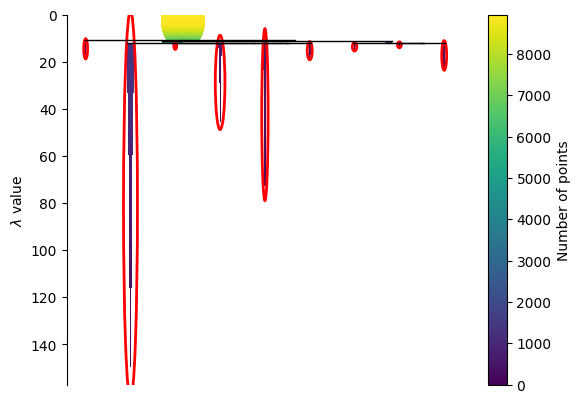

In [97]:
import seaborn as sns

clusterer.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette('deep', 5))

In [98]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 80, min_samples =15)
cluster_labels = clusterer.fit_predict(df_norm)
df['hdbscan_DB'] = cluster_labels
df_hdbscan = df.groupby('hdbscan_DB')
df_hdbscan.mean()

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos,kmeans,hdbscan_silhouete
hdbscan_DB,,,,,,,,,,,
-1,1793.788870,0.838139,1557.872798,604.744776,0.601943,0.282744,21.363332,5752.160904,2408.530070,1.526580,0.362495
0,779.159776,0.999186,1756.178060,386.847701,0.995274,0.987313,29.952239,5461.850746,1807.846754,2.000000,-0.011940
1,53.807200,0.249063,225.781194,14.073507,0.097262,0.074563,1.432836,2567.164179,489.509643,0.000000,2.000000
2,667.208507,0.623242,0.000000,0.000000,0.000000,0.000000,0.004640,1975.174014,995.981992,0.000000,3.000000
3,85.016673,0.872956,510.938118,511.984941,0.842666,0.000000,10.129412,1972.941176,511.398867,2.976471,1.000000
4,51.471446,0.571443,299.757436,299.757436,0.518320,0.000000,6.675214,2441.310541,430.726476,1.034188,1.000000
5,2447.351399,1.000000,0.000000,0.014870,0.000000,0.000000,0.001487,3803.085502,1146.181840,0.000000,4.000000
6,648.903888,1.000000,879.652054,635.292768,1.000000,0.133514,21.258929,2319.642857,890.172152,3.000000,5.000000
7,1422.098991,1.000000,364.280093,4.733163,0.164495,0.163332,3.134884,2881.162791,797.293268,0.263566,6.000000


<Axes: ylabel='$\\lambda$ value'>

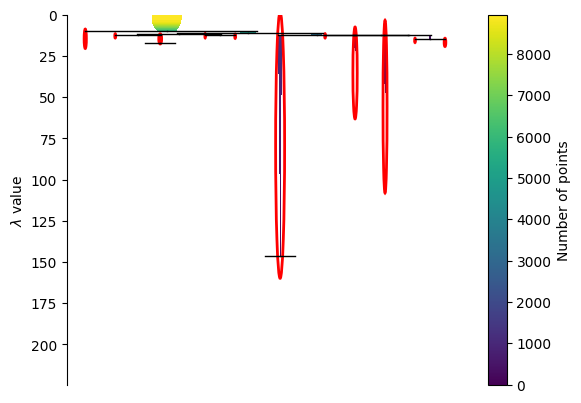

In [99]:
clusterer.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette('deep', 8))

In [100]:
df = df.drop(columns = ['hdbscan_DB'])
df = df.rename(columns = {'hdbscan_silhouete':'hdbscan'})

In [101]:
df

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos,kmeans,hdbscan
0,40.900749,0.818182,95.40,95.40,0.166667,0.000000,2,1000.0,201.802084,0,-1
1,3202.467416,0.909091,0.00,0.00,0.000000,0.000000,0,7000.0,4103.032597,0,3
2,2495.148862,1.000000,773.17,0.00,1.000000,1.000000,12,7500.0,622.066742,2,0
3,1666.670542,0.636364,1499.00,0.00,0.083333,0.083333,1,7500.0,0.000000,0,-1
4,817.714335,1.000000,16.00,0.00,0.083333,0.083333,1,1200.0,678.334763,0,6
...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,1.000000,0.000000,6,1000.0,325.594462,3,7
8946,19.183215,1.000000,300.00,300.00,1.000000,0.000000,6,1000.0,275.861322,3,7
8947,23.398673,0.833333,144.40,144.40,0.833333,0.000000,5,1000.0,81.270775,3,1
8948,13.457564,0.833333,0.00,0.00,0.000000,0.000000,0,500.0,52.549959,0,3


# Rand Index


In [102]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(df['kmeans'],df['hdbscan'])

0.14632831487390402

# Informações Extraidas Dos Grupos

## K-Means

### Distribuição dos Grupos

In [103]:
df_kmeans = df.groupby('kmeans')
df_kmeans.count()

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos,hdbscan
kmeans,,,,,,,,,,
0,3457,3457,3457,3457,3457,3457,3457,3457,3457,3457
1,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864
2,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446
3,2182,2182,2182,2182,2182,2182,2182,2182,2182,2182


In [104]:
df_kmeans_count = df_kmeans.count()

In [105]:
fig = go.Figure(go.Bar(x = ['0','1', '2', '3'], y = df_kmeans_count['Saldo']))
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Distribuição dos Grupos - KMeans',
        x = 0.5,
        font = dict(
            family = 'Helvetica',
            size = 30,
            color = 'White'
        )
    ),
    font=dict(
        family="Helvetica",
        size=16,
        color="White"
    ),
    xaxis_title = 'Clusters',
    yaxis_title = 'Quantidade'
)
fig.show()

### Média Das Variáveis dos Grupos

In [106]:
df_kmeans.mean()

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos,hdbscan
kmeans,,,,,,,,,,
0,1800.389024,0.823143,126.316914,16.892294,0.053887,0.034177,0.886318,4055.893707,1496.692650,3.293029
1,1263.744217,0.821475,770.389034,274.447575,0.453788,0.186635,8.910944,4288.437351,1344.827934,1.457082
2,1989.799523,0.981162,3302.174502,898.655754,0.920732,0.801866,44.898340,6789.036841,3324.957534,-0.246888
3,1166.460642,0.942168,1068.311732,829.345674,0.928098,0.085453,21.565536,3844.642113,1385.386838,3.064161


### Minímo e Máximo

In [107]:
df_kmeans.min()

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos,hdbscan
kmeans,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,50.0,0.0,-1
1,0.0,0.0,0.0,0.0,0.222222,0.000000,0,200.0,0.0,-1
2,0.0,0.0,8.4,0.0,0.583333,0.416667,5,300.0,0.0,-1
3,0.0,0.0,12.0,12.0,0.636364,0.000000,0,400.0,0.0,-1


In [108]:
df_kmeans.max()

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos,hdbscan
kmeans,,,,,,,,,,
0,14581.45914,1.0,17945.00,3000.00,0.300000,0.200000,32,23000.0,50721.48336,8
1,16304.88925,1.0,22500.00,22500.00,0.857143,0.625000,186,23000.0,39461.96580,8
2,19043.13856,1.0,49039.57,15497.19,1.000000,1.000000,358,30000.0,46930.59824,6
3,16115.59640,1.0,14686.10,14686.10,1.000000,0.454545,347,19500.0,40627.59524,8


## HDBSCAN

In [109]:
df_hdbscan = df.groupby('hdbscan')

### Distribuição dos Grupos

In [110]:
df_hdbscan_count = df_hdbscan.count()

In [111]:
fig = go.Figure(go.Bar(x = df_hdbscan_count.index, y = df_hdbscan_count['Saldo']))
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Distribuição dos Grupos - HDBSCAN',
        x = 0.5,
        font = dict(
            family = 'Helvetica',
            size = 30,
            color = 'White'
        )
    ),
    font=dict(
        family="Helvetica",
        size=16,
        color="White"
    ),
    xaxis_title = 'Clusters',
    yaxis_title = 'Quantidade'
)
fig.show()

### Médias Das Variáveis dos Grupos

In [112]:
df_hdbscan.mean()

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos,kmeans
hdbscan,,,,,,,,,,
-1,2017.848458,0.846580,1882.743731,719.246525,0.654295,0.320793,25.164269,6405.691350,2836.598520,1.671174
0,853.351605,0.999292,1896.287273,412.998961,0.992641,0.986255,31.968831,5734.077922,1930.997482,2.000000
1,74.017354,0.640224,356.713494,352.929862,0.564718,0.003539,7.296552,2471.858238,505.289950,1.457471
2,201.346310,0.417810,288.389689,17.696969,0.115133,0.096525,1.898964,2674.352332,693.116586,0.041451
3,821.017108,0.625398,0.000000,0.000000,0.000000,0.000000,0.004098,2390.300546,1117.869700,0.000000
4,2536.586008,1.000000,0.000000,0.062374,0.000000,0.000000,0.001435,4051.757532,1288.262364,0.000000
5,885.019129,1.000000,1275.381754,798.385579,1.000000,0.231136,27.161404,3299.473684,1172.045609,2.891228
6,1599.069175,1.000000,487.316104,28.267710,0.248772,0.220250,5.254922,3251.968912,934.748874,0.517098
7,586.510139,1.000000,684.049403,684.223014,1.000000,0.000000,17.337520,2521.585557,770.362572,3.000000


### Mínimo e Máximo

In [113]:
df_hdbscan.min()

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos,kmeans
hdbscan,,,,,,,,,,
-1,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0,50.0,0.0,0
0,9.755390,0.909091,8.40,0.00,0.916667,0.875000,8,300.0,0.0,2
1,0.533581,0.181818,26.62,26.62,0.166667,0.000000,2,300.0,0.0,0
2,0.000199,0.090909,0.01,0.00,0.083333,0.000000,0,300.0,0.0,0
3,0.001146,0.090909,0.00,0.00,0.000000,0.000000,0,150.0,0.0,0
4,1.691842,1.000000,0.00,0.00,0.000000,0.000000,0,150.0,0.0,0
5,9.581344,1.000000,65.82,25.92,1.000000,0.083333,8,500.0,0.0,2
6,5.006737,1.000000,0.05,0.00,0.083333,0.083333,1,150.0,0.0,0
7,4.160112,1.000000,33.40,33.40,1.000000,0.000000,0,400.0,0.0,3


In [114]:
df_hdbscan.max()

,Saldo,Frequência do Saldo,Valor Total,Valor Total Compras Parceladas,Frequência de Compras,Frequência de Compras Únicas,Número de Compras,Limite de Crédito,Pagamentos,kmeans
hdbscan,,,,,,,,,,
-1,19043.138560,1.000000,49039.57,22500.00,1.000000,1.000000,358,30000.0,50721.483360,3
0,5573.146558,1.000000,6954.28,3058.17,1.000000,1.000000,114,18000.0,7486.398825,2
1,1089.696979,0.909091,1800.00,1800.00,0.916667,0.166667,24,7500.0,2550.799492,3
2,2133.665075,0.909091,2351.58,632.00,0.250000,0.250000,17,8500.0,4644.142145,1
3,5998.431562,0.909091,0.00,0.00,0.000000,0.000000,2,10000.0,6744.953537,0
4,11581.933500,1.000000,0.00,66.95,0.000000,0.000000,1,16000.0,11080.962200,0
5,3560.977973,1.000000,3727.77,2632.32,1.000000,0.583333,62,8500.0,4086.277963,3
6,8559.236795,1.000000,3237.47,1300.00,0.750000,0.750000,35,11500.0,6537.913767,2
7,5274.508501,1.000000,3816.00,3816.00,1.000000,0.000000,69,11500.0,4613.536289,3
